### Ultra-Sonography Machine Manufacturing :

A complex modern Ultra SonoGraphy manufacturing, assembly and testing process is normally under consistent surveillance via the monitoring of signals/variables collected from sensors and or process measurement points. Almost all of these signals are equally valuable in a specific monitoring, assembly & testing system. The measured signals contain a combination of useful information, irrelevant information as well as noise. It is often the case that useful information is buried in the latter two.

A large number of vendors, suppliers are involved in the manufacturing and assembly of the devices. The objective is to save the manufacturing time, cost, need to reduce the number of testing points. After reduction of Testing points, the assembly line will be redesigned to save money without significant compromise in the quality.

In [1]:
# Importing the Libraries :

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings ('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
# Reading the dataset :

data = pd.read_csv ('ultrasound_1.csv')
data.head()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2973.86,2359.01,2196.6555,1066.1908,1.2188,100.0,101.8900,0.1215,1.4544,-0.0052,...,NaN,0.5025,0.0128,0.0040,2.5391,0.0199,0.0117,0.0043,58.5665,1
1,3052.82,2525.33,2186.2667,1088.7359,1.2723,100.0,103.5633,0.1216,1.4891,-0.0007,...,131.2543,0.5003,0.0150,0.0043,2.9976,0.0228,0.0299,0.0105,131.2543,-1
2,2914.47,2492.14,2181.6111,1083.3937,1.2484,100.0,104.1478,0.1219,1.5568,-0.0214,...,NaN,0.4939,0.0136,0.0037,2.7633,0.0228,0.0299,0.0105,131.2543,-1
3,2959.86,2491.19,2208.0000,1835.9832,1.5714,100.0,100.2478,0.1239,1.4680,0.0033,...,128.2819,0.4993,0.0138,0.0038,2.7630,0.0140,0.0180,0.0054,128.2819,1
4,2964.77,2524.44,2181.5111,1177.0830,1.3012,100.0,100.9333,0.1216,1.4047,-0.0080,...,NaN,0.4984,0.0155,0.0040,3.1012,0.0140,0.0180,0.0054,128.2819,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1577 entries, 0 to 1576
Columns: 577 entries, 0 to Pass/Fail
dtypes: float64(576), int64(1)
memory usage: 6.9 MB


In [4]:
# Finding Missing Values :

data.isnull().sum().sum()

42093

In [5]:
data = data.replace (np.NaN, 0)
data.isnull().sum().sum()

0

In [6]:
unique_vals = data ['Pass/Fail'].unique()
unique_vals

array([ 1, -1], dtype=int64)

In [7]:
data ['Pass/Fail'] = data ['Pass/Fail'].map ({-1 : 0, 1 : 1})

In [8]:
data ['Pass/Fail'].value_counts()

0    1472
1     105
Name: Pass/Fail, dtype: int64

In [9]:
data100 = data.copy()
data100.head()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2973.86,2359.01,2196.6555,1066.1908,1.2188,100.0,101.8900,0.1215,1.4544,-0.0052,...,0.0000,0.5025,0.0128,0.0040,2.5391,0.0199,0.0117,0.0043,58.5665,1
1,3052.82,2525.33,2186.2667,1088.7359,1.2723,100.0,103.5633,0.1216,1.4891,-0.0007,...,131.2543,0.5003,0.0150,0.0043,2.9976,0.0228,0.0299,0.0105,131.2543,0
2,2914.47,2492.14,2181.6111,1083.3937,1.2484,100.0,104.1478,0.1219,1.5568,-0.0214,...,0.0000,0.4939,0.0136,0.0037,2.7633,0.0228,0.0299,0.0105,131.2543,0
3,2959.86,2491.19,2208.0000,1835.9832,1.5714,100.0,100.2478,0.1239,1.4680,0.0033,...,128.2819,0.4993,0.0138,0.0038,2.7630,0.0140,0.0180,0.0054,128.2819,1
4,2964.77,2524.44,2181.5111,1177.0830,1.3012,100.0,100.9333,0.1216,1.4047,-0.0080,...,0.0000,0.4984,0.0155,0.0040,3.1012,0.0140,0.0180,0.0054,128.2819,1


In [10]:
X = data100.drop (['Pass/Fail'], axis = 1)
y = data100 ['Pass/Fail']

In [11]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.3, stratify = y, random_state = 100)

In [12]:
from imblearn.over_sampling import SMOTE

In [13]:
sm = SMOTE()
X_train_smote, y_train_smote = sm.fit_resample (X_train, y_train)

print ('Before balancing X_train', X_train.shape)
print()
print ('Before balancing y_train', y_train.shape)
print()
print ('Number of classes before balancing : \n', y_train.value_counts())

Before balancing X_train (1103, 576)

Before balancing y_train (1103,)

Number of classes before balancing : 
 0    1030
1      73
Name: Pass/Fail, dtype: int64


In [14]:
print ('After balancing X_train', X_train_smote.shape)
print()
print ('After balancing y_train', y_train_smote.shape)
print()
print ('Number of classes after balancing : \n', y_train_smote.value_counts())

After balancing X_train (2060, 576)

After balancing y_train (2060,)

Number of classes after balancing : 
 0    1030
1    1030
Name: Pass/Fail, dtype: int64


In [15]:
from imblearn.under_sampling import RandomUnderSampler
under = RandomUnderSampler()
X_train_under, y_train_under = under.fit_resample (X_train, y_train)
print (X_train_under.shape)
print (y_train_under.shape)
print ('After random undersampling method : ')
y_train_under.value_counts()

(146, 576)
(146,)
After random undersampling method : 


0    73
1    73
Name: Pass/Fail, dtype: int64

In [16]:
from imblearn.over_sampling import RandomOverSampler
over = RandomOverSampler()
X_train_over, y_train_over = over.fit_resample (X_train, y_train)
print (X_train_over.shape)
print (y_train_over.shape)
print ('After random oversampling method : ')
y_train_over.value_counts()

(2060, 576)
(2060,)
After random oversampling method : 


0    1030
1    1030
Name: Pass/Fail, dtype: int64

In [17]:
nunique = data.apply (pd.Series.nunique)
nunique

0            1489
1            1497
2             503
3             512
4             503
             ... 
586           319
587           256
588           119
589           602
Pass/Fail       2
Length: 577, dtype: int64

In [18]:
const_cols = nunique [nunique == 1].index
const_cols.shape

(102,)

In [19]:
data.shape

(1577, 577)

In [20]:
data1 = data.drop (const_cols, axis = 1)
data1.shape

(1577, 475)

In [21]:
# Always check accuracy after dropping columns.

In [22]:
# creating a correlation matrix :

corr_matrix = data1.corr()
corr_matrix

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,1.000000,-0.051731,0.009742,0.005773,-0.001583,0.011104,0.008468,0.011955,-0.056840,0.012133,...,-0.029241,0.007309,0.026022,0.024993,0.025688,0.045321,-0.003207,-0.003095,0.018692,0.008540
1,-0.051731,1.000000,-0.030590,0.007414,0.002214,-0.030153,-0.032144,-0.024789,0.027273,0.002883,...,0.042705,-0.017285,0.003667,0.003975,0.003654,-0.009365,0.039222,0.040154,0.044994,-0.021934
2,0.009742,-0.030590,1.000000,0.323217,0.020441,0.990083,0.818672,0.746932,0.002709,-0.047061,...,0.038127,-0.010349,-0.012305,-0.010042,-0.011645,0.015333,-0.007861,-0.010088,-0.030468,0.025613
3,0.005773,0.007414,0.323217,1.000000,-0.053751,0.285600,-0.119392,0.279457,-0.109926,0.055518,...,0.000344,0.008890,0.032600,0.032053,0.033658,0.035564,-0.040474,-0.035538,-0.083088,-0.017971
4,-0.001583,0.002214,0.020441,-0.053751,1.000000,0.007012,-0.034789,-0.475745,-0.020116,0.054158,...,0.107129,0.012666,-0.000662,-0.001077,-0.001087,-0.043489,-0.030680,-0.025844,0.050573,-0.013551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,0.045321,-0.009365,0.015333,0.035564,-0.043489,0.018959,-0.004821,0.049942,0.018117,0.033313,...,-0.209531,-0.007627,0.002775,0.002197,0.003514,1.000000,0.166299,0.161676,-0.487661,-0.010005
587,-0.003207,0.039222,-0.007861,-0.040474,-0.030680,-0.003294,0.017619,-0.007111,0.028371,0.054371,...,0.225530,0.018858,-0.001698,-0.000805,-0.002008,0.166299,1.000000,0.973904,0.391219,0.018311
588,-0.003095,0.040154,-0.010088,-0.035538,-0.025844,-0.005148,0.014776,-0.014796,0.033821,0.056405,...,0.215194,0.019306,0.002530,0.003497,0.002206,0.161676,0.973904,1.000000,0.390503,0.015415
589,0.018692,0.044994,-0.030468,-0.083088,0.050573,-0.025863,0.001934,-0.065981,-0.016404,0.003832,...,0.431895,0.028049,0.003220,0.002833,0.002130,-0.487661,0.391219,0.390503,1.000000,-0.002682


<AxesSubplot:>

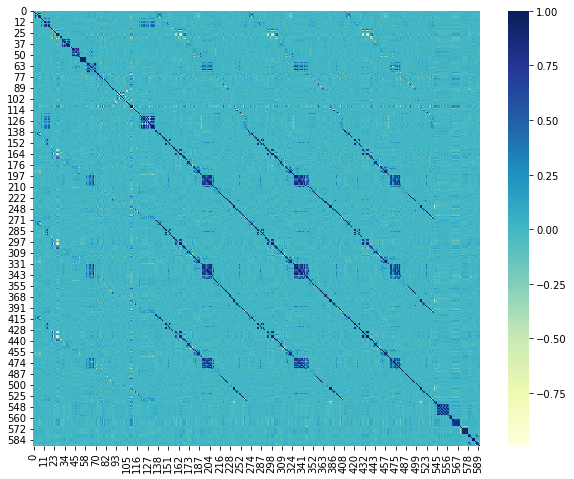

In [23]:
# Heatmap :
plt.figure (figsize = (10, 8))
sns.heatmap (corr_matrix, cmap = 'YlGnBu')

In [24]:
upper = corr_matrix.where (np.triu (np.ones (corr_matrix.shape), k = 1).astype (bool))
upper

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,NaN,-0.051731,0.009742,0.005773,-0.001583,0.011104,0.008468,0.011955,-0.056840,0.012133,...,-0.029241,0.007309,0.026022,0.024993,0.025688,0.045321,-0.003207,-0.003095,0.018692,0.008540
1,NaN,NaN,-0.030590,0.007414,0.002214,-0.030153,-0.032144,-0.024789,0.027273,0.002883,...,0.042705,-0.017285,0.003667,0.003975,0.003654,-0.009365,0.039222,0.040154,0.044994,-0.021934
2,NaN,NaN,NaN,0.323217,0.020441,0.990083,0.818672,0.746932,0.002709,-0.047061,...,0.038127,-0.010349,-0.012305,-0.010042,-0.011645,0.015333,-0.007861,-0.010088,-0.030468,0.025613
3,NaN,NaN,NaN,NaN,-0.053751,0.285600,-0.119392,0.279457,-0.109926,0.055518,...,0.000344,0.008890,0.032600,0.032053,0.033658,0.035564,-0.040474,-0.035538,-0.083088,-0.017971
4,NaN,NaN,NaN,NaN,NaN,0.007012,-0.034789,-0.475745,-0.020116,0.054158,...,0.107129,0.012666,-0.000662,-0.001077,-0.001087,-0.043489,-0.030680,-0.025844,0.050573,-0.013551
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.166299,0.161676,-0.487661,-0.010005
587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.973904,0.391219,0.018311
588,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.390503,0.015415
589,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.002682


<AxesSubplot:>

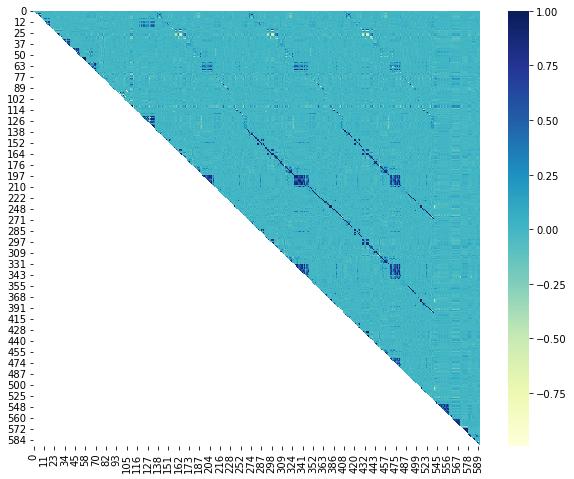

In [25]:
plt.figure (figsize = (10, 8))
sns.heatmap (upper, cmap = 'YlGnBu')

In [26]:
# finding the columns having correlation coeffiecient more than 0.9 and less than -0.9 :

neg_correlated = [column for column in upper.columns
                 if any (upper [column] < -0.9)]
pos_correlated = [column for column in upper.columns
                 if any (upper [column] > 0.9)]
print ('Negative Correlated : \n',neg_correlated)
print()
print('Positive Correlated : \n',pos_correlated)

Negative Correlated : 
 ['96', '104', '105', '106']

Positive Correlated : 
 ['5', '18', '27', '38', '39', '50', '54', '55', '56', '57', '58', '66', '70', '73', '101', '110', '111', '123', '124', '127', '131', '133', '140', '148', '152', '154', '164', '165', '174', '199', '204', '207', '220', '245', '246', '249', '252', '270', '271', '272', '273', '274', '275', '277', '278', '279', '280', '281', '282', '283', '285', '286', '287', '288', '289', '290', '291', '292', '293', '294', '295', '296', '297', '298', '299', '300', '301', '302', '303', '304', '305', '306', '307', '308', '309', '310', '311', '312', '317', '318', '319', '320', '321', '323', '324', '331', '332', '333', '334', '335', '336', '337', '338', '339', '340', '341', '342', '343', '344', '346', '347', '348', '349', '350', '351', '352', '353', '354', '355', '356', '357', '358', '359', '360', '361', '362', '363', '365', '366', '376', '377', '382', '383', '384', '385', '386', '387', '388', '389', '390', '391', '392', '393', '405',

In [27]:
total_correlated = neg_correlated + pos_correlated
print ('No. of columns having high corr. coeff. which are to be dropped : ', len (total_correlated))

No. of columns having high corr. coeff. which are to be dropped :  226


In [28]:
data1.shape

(1577, 475)

In [29]:
df = data1.drop (total_correlated, axis = 1)
df.shape

(1577, 249)

In [30]:
# VIF Approach :
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [31]:
vif = pd.DataFrame()
vif ['variables'] = df.columns
vif ['VIF'] = [variance_inflation_factor (df.values, i)
              for i in range (df.shape [1])]
vif

,variables,VIF
0,0,337.321095
1,1,222.401571
2,2,1395.482566
3,3,83.834809
4,4,3.967367
...,...,...
244,583,3.064608
245,586,10.047529
246,587,14.777588
247,589,6.948416


In [32]:
vif

,variables,VIF
0,0,337.321095
1,1,222.401571
2,2,1395.482566
3,3,83.834809
4,4,3.967367
...,...,...
244,583,3.064608
245,586,10.047529
246,587,14.777588
247,589,6.948416


In [33]:
high_vif = vif [vif ['VIF'] > 10].sort_values ('VIF')
high_vif.shape

(165, 2)

In [34]:
# We must add constant when we calculate the VIF :

In [35]:
import statsmodels.api as sm
df1 = sm.add_constant (df)

In [36]:
vif1 = pd.DataFrame()
vif1 ['variables'] = df1.columns
vif1 ['VIF'] = [variance_inflation_factor (df1.values, i)
              for i in range (df1.shape [1])]
vif1

,variables,VIF
0,const,123447.705529
1,0,1.273804
2,1,1.217282
3,2,12.647160
4,3,8.295323
...,...,...
245,583,1.264107
246,586,2.502413
247,587,3.302547
248,589,3.255377


In [37]:
high_vif_1 = vif1 [vif1 ['VIF'] > 10].sort_values ('VIF')
high_vif_1.shape

(60, 2)

In [38]:
df2 = df1.drop (high_vif_1 ['variables'], axis = 1)
df2.shape

(1577, 190)

In [39]:
# Dependent and independent variable :

X = df2.drop (['Pass/Fail'], axis = 1)
y = df2 ['Pass/Fail']

In [40]:
from sklearn.feature_selection import SelectFromModel, RFECV
from sklearn.ensemble import RandomForestClassifier

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split (X, y, random_state = 101, test_size = 0.2, stratify = y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1261, 189)
(316, 189)
(1261,)
(316,)


In [42]:
sfm = SelectFromModel (RandomForestClassifier (n_estimators = 100, random_state = True, n_jobs = -1, verbose = 3))
# sfm = SelectFromModel (RFECV (estimator = RandomForestClassifier()))
sfm.fit (X_train, y_train)

building tree 1 of 100building tree 2 of 100building tree 3 of 100building tree 4 of 100



building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.1s


building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished


SelectFromModel(estimator=RandomForestClassifier(n_jobs=-1, random_state=True,
                                                 verbose=3))

In [43]:
sfm.get_support()
# features which pass the benchmark will show as True otherwise False

array([ True, False, False, False, False, False, False, False,  True,
       False, False, False,  True, False,  True,  True, False, False,
       False, False,  True, False,  True, False,  True,  True, False,
        True,  True,  True,  True,  True, False,  True, False,  True,
       False, False,  True, False, False, False,  True, False,  True,
       False, False, False,  True, False, False, False,  True,  True,
        True, False, False,  True, False, False, False, False,  True,
        True,  True,  True, False, False, False, False,  True, False,
       False, False, False, False,  True, False, False, False, False,
        True, False,  True, False,  True, False, False, False, False,
        True,  True,  True,  True,  True, False, False, False,  True,
       False, False, False,  True,  True, False,  True,  True, False,
       False, False, False,  True,  True, False, False, False, False,
        True, False, False, False,  True,  True,  True, False,  True,
       False, False,

In [44]:
print ('benchmark : mean of feature importance : ', np.mean (sfm.estimator_.feature_importances_))

benchmark : mean of feature importance :  0.005291005291005291


In [45]:
sfm.estimator_.feature_importances_

array([0.00959887, 0.00394663, 0.00451148, 0.00328944, 0.00370207,
       0.00469796, 0.00425752, 0.0027373 , 0.0071288 , 0.00335234,
       0.00386895, 0.00363767, 0.00555292, 0.00215955, 0.00567553,
       0.01385646, 0.00433148, 0.00357733, 0.00435727, 0.00409039,
       0.00850762, 0.00319194, 0.00560343, 0.0033672 , 0.01310381,
       0.00602359, 0.00495159, 0.00607063, 0.0265737 , 0.01035962,
       0.0053481 , 0.0107107 , 0.00240958, 0.01550197, 0.0044656 ,
       0.00579118, 0.00412825, 0.00374106, 0.0057057 , 0.00450783,
       0.00378438, 0.00053837, 0.00598451, 0.0020146 , 0.00765714,
       0.00405234, 0.00208333, 0.00349487, 0.00953455, 0.00229765,
       0.00515366, 0.00452883, 0.00677514, 0.00771679, 0.00634558,
       0.00354564, 0.00085453, 0.00540305, 0.00329997, 0.00512612,
       0.0046574 , 0.00257693, 0.00996301, 0.00633293, 0.01180971,
       0.00743335, 0.00305368, 0.00164006, 0.00274753, 0.00234671,
       0.00585847, 0.00351023, 0.00265207, 0.00454462, 0.00416

In [46]:
feature_selected_sfm = X_train.columns [sfm.get_support()]
feature_selected_sfm

Index(['0', '10', '17', '20', '21', '30', '33', '40', '41', '53', '59', '71',
       '72', '75', '77', '79', '82', '86', '88', '93', '102', '103', '107',
       '112', '117', '118', '119', '120', '129', '138', '146', '153', '156',
       '163', '166', '167', '168', '169', '173', '180', '181', '183', '184',
       '210', '211', '216', '221', '222', '223', '227', '239', '247', '248',
       '254', '267', '269', '316', '345', '419', '433', '438', '439', '468',
       '476', '500', '510', '511', '550', '551', '571', '573', '582', '587',
       '589'],
      dtype='object')

In [47]:
feature_selected_sfm.shape

(74,)

In [48]:
X_train_final = X_train [feature_selected_sfm]
X_train_final

,0,10,17,20,21,30,33,40,41,53,...,500,510,511,550,551,571,573,582,587,589
1250,3185.69,0.0038,0.9791,1.3985,-5248.75,0.1917,8.7556,8.532,4.194,4.657,...,0.0000,81.3239,356.7568,20.32,0.78,1.0744,0.1416,0.5055,0.0095,41.2178
244,3107.79,-0.0087,0.9545,1.4159,-6393.25,0.2079,8.5788,76.550,3.473,4.567,...,773.0887,46.7043,675.5556,14.47,0.63,1.7220,0.1799,0.4958,0.0271,176.0329
1287,3007.39,0.0062,0.9688,1.3937,-5454.00,0.2191,8.3383,78.380,3.409,4.604,...,0.0000,56.2500,0.0000,14.53,1.33,2.0841,0.2392,0.4979,0.0148,80.1759
514,2884.65,-0.0013,0.9725,1.4170,-5232.25,0.2033,8.6590,77.740,2.864,4.584,...,936.9369,57.9710,0.0000,15.49,1.88,2.0870,0.3270,0.4982,0.0217,77.7519
97,3049.31,0.0028,0.9712,1.3971,-5497.75,0.2416,8.7947,76.520,2.859,4.632,...,0.0000,116.5829,0.0000,13.86,1.01,2.3956,0.3566,0.4998,0.0184,192.2985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,2910.99,-0.0117,0.9754,1.4107,-5654.75,0.2036,8.9857,78.950,3.282,4.601,...,615.3846,41.3793,0.0000,26.59,1.54,1.9614,0.2936,0.4997,0.0236,139.6209
1234,3196.21,0.0049,0.9735,1.4240,-5521.00,0.1889,8.6620,81.320,2.743,4.572,...,0.0000,68.5714,0.0000,17.16,1.16,1.7909,1.0166,0.5058,0.0188,353.8319
731,3048.54,-0.0002,0.9796,1.4038,-5549.25,0.2013,8.5615,79.000,3.478,4.597,...,0.0000,53.0760,555.5556,22.35,1.60,2.0051,0.2754,0.5038,0.0084,25.1494
587,2984.30,0.0101,0.9768,1.4115,-6208.75,0.1786,8.5459,77.720,2.013,4.617,...,264.1366,49.0934,0.0000,19.70,0.76,2.0153,0.1975,0.4936,0.0167,86.9681


In [49]:
X_train_final.shape

(1261, 74)

In [50]:
X_test_final = X_test [feature_selected_sfm]
X_test_final

,0,10,17,20,21,30,33,40,41,53,...,500,510,511,550,551,571,573,582,587,589
1154,3171.54,-0.0096,0.9548,1.4402,-6029.00,0.1427,8.3220,82.30,3.178,4.593,...,729.4118,31.7181,360.000,14.53,1.33,2.0270,0.2944,0.5041,0.0181,51.0695
900,3066.38,0.0112,0.9772,1.4041,-5497.50,0.1617,8.5571,78.29,2.791,4.619,...,0.0000,36.7521,0.000,16.23,0.87,2.6194,0.2265,0.4998,0.0054,24.6547
738,2957.59,-0.0028,0.9788,1.4186,-5797.00,0.0777,8.8889,80.31,3.395,4.563,...,508.1545,34.2688,759.322,16.49,1.18,2.3534,0.3606,0.4991,0.0162,59.9813
1572,2855.80,-0.0016,0.9740,1.4035,-5537.50,0.2304,9.1784,74.80,3.698,4.609,...,0.0000,39.2906,0.000,24.21,1.95,2.0713,0.3184,0.5011,0.0152,69.4220
1510,2966.20,-0.0068,0.9758,1.3829,-6427.50,0.1760,8.6384,78.33,1.912,4.626,...,0.0000,50.2564,0.000,21.08,0.73,2.3188,0.4262,0.4976,0.0117,33.4695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,2935.73,0.0068,0.9601,1.4105,-5421.50,0.2596,9.2655,11.52,3.923,4.655,...,0.0000,35.3780,0.000,16.96,0.57,1.7577,0.1517,0.5019,0.0169,139.8330
968,2941.85,-0.0112,0.9604,1.4112,-5300.25,0.1987,8.8078,0.00,0.000,4.569,...,913.2075,32.8205,0.000,15.11,1.02,2.4103,0.4025,0.5024,0.0088,40.4322
1128,3041.09,-0.0095,0.9756,1.4067,-5399.25,0.1763,8.9420,79.90,3.233,4.588,...,901.2407,25.2492,0.000,15.57,1.78,2.0135,0.3006,0.5023,0.0117,45.3908
0,2973.86,-0.0003,0.9720,1.3993,-6362.50,0.2229,8.6667,14.55,4.866,4.544,...,0.0000,68.7631,0.000,21.84,1.53,2.2935,0.1188,0.5025,0.0117,58.5665


In [51]:
X_test_final.shape

(316, 74)

In [52]:
y_train.shape

(1261,)

In [53]:
y_test.shape

(316,)

In [54]:
y_train.value_counts()

0    1177
1      84
Name: Pass/Fail, dtype: int64

In [55]:
y_test.value_counts()

0    295
1     21
Name: Pass/Fail, dtype: int64

In [80]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_train_final_smote, y_train_smote = sm.fit_resample (X_train_final, y_train)

In [81]:
sm1 = SMOTE()
X_test_final_smote, y_test_smote = sm1.fit_resample (X_test_final, y_test)

In [56]:
# Build a model with :
# Accuracy > 80 %
# Precision > 50 %
# Recall > 50 %

#### Logistic Regression :

In [83]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression (random_state = 42)
lr.fit (X_train_final_smote, y_train_smote)

LogisticRegression(random_state=42)

In [84]:
y_pred = lr.predict (X_test_final_smote)
y_pred

array([1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,

In [85]:
y_test_smote

0      0
1      0
2      0
3      0
4      0
      ..
585    1
586    1
587    1
588    1
589    1
Name: Pass/Fail, Length: 590, dtype: int64

In [86]:
# Confusion Matrix :

from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix (y_test_smote, y_pred)
conf_matrix


array([[198,  97],
       [177, 118]], dtype=int64)

<AxesSubplot:>

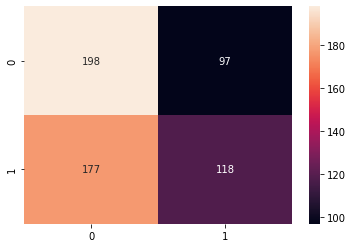

In [87]:
sns.heatmap (conf_matrix, annot = True, fmt = 'd')

In [88]:
from sklearn import metrics

In [90]:
print ('Accuracy : ', metrics.accuracy_score (y_test_smote, y_pred))

Accuracy :  0.535593220338983


In [91]:
print ('Precision : ', metrics.precision_score (y_test_smote, y_pred))

Precision :  0.5488372093023256


In [92]:
print ('Recall : ', metrics.recall_score (y_test_smote, y_pred))

Recall :  0.4


In [142]:
print (classification_report (y_test_smote, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.67      0.59       295
           1       0.55      0.40      0.46       295

    accuracy                           0.54       590
   macro avg       0.54      0.54      0.53       590
weighted avg       0.54      0.54      0.53       590



#### Decision Tree Classifier :

In [67]:
# Decision Tree Classifier :

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier (criterion = 'gini', random_state = 4)


In [93]:
from sklearn.model_selection import GridSearchCV
param_dist = {'max_depth' : [3, 5, 6, 7], 'min_samples_split' : [50, 100, 150, 200, 250]}
gscv_dtc = GridSearchCV (dtc, cv = 10, param_grid = param_dist, n_jobs = -1)
gscv_dtc.fit (X_train_final_smote, y_train_smote)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(max_depth=3,
                                              min_samples_split=150,
                                              random_state=4),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 6, 7],
                         'min_samples_split': [50, 100, 150, 200, 250]})

In [94]:
gscv_dtc.best_params_

{'max_depth': 7, 'min_samples_split': 50}

In [95]:
dtc = DecisionTreeClassifier (criterion = 'gini', random_state = 4, max_depth = 7, min_samples_split = 50)
dtc.fit (X_train_final_smote, y_train_smote)

DecisionTreeClassifier(max_depth=7, min_samples_split=50, random_state=4)

In [96]:
y_pred_dtc = dtc.predict (X_test_final_smote)

In [98]:
dtc_conf_matrix = confusion_matrix (y_test_smote, y_pred_dtc)
dtc_conf_matrix

array([[244,  51],
       [110, 185]], dtype=int64)

<AxesSubplot:>

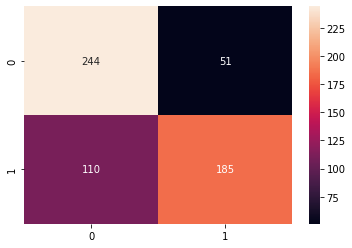

In [99]:
sns.heatmap (dtc_conf_matrix, annot = True, fmt = 'd')

In [100]:
print ('Decision Tree Metrics')
print ('Accuracy : ', metrics.accuracy_score (y_test_smote, y_pred_dtc))
print ('Precision : ', metrics.precision_score (y_test_smote, y_pred_dtc))
print ('Recall : ', metrics.recall_score (y_test_smote, y_pred_dtc))
print ('f1_score : ', metrics.f1_score (y_test_smote, y_pred_dtc))

Decision Tree Metrics
Accuracy :  0.7271186440677966
Precision :  0.7838983050847458
Recall :  0.6271186440677966
f1_score :  0.696798493408663


In [140]:
print (classification_report (y_test_smote, y_pred_dtc))

              precision    recall  f1-score   support

           0       0.69      0.83      0.75       295
           1       0.78      0.63      0.70       295

    accuracy                           0.73       590
   macro avg       0.74      0.73      0.72       590
weighted avg       0.74      0.73      0.72       590



#### K Nearest Neighbors ( KNN ) :

In [136]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier (n_neighbors = 1)
knn.fit (X_train_final_smote, y_train_smote)
pred = knn.predict (X_test_final_smote)

In [137]:
conf_matrix_knn = confusion_matrix (y_test_smote, pred)
conf_matrix_knn

array([[254,  41],
       [233,  62]], dtype=int64)

<AxesSubplot:>

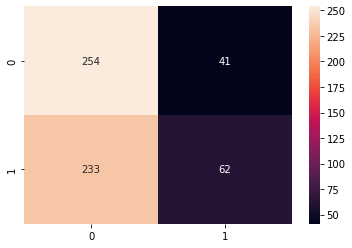

In [138]:
sns.heatmap (conf_matrix_knn, annot = True, fmt = 'd')

In [139]:
print ('KNN Metrics')
print()
print ('Accuracy : ', metrics.accuracy_score (y_test_smote, pred))
print ('Precision : ', metrics.precision_score (y_test_smote, pred))
print ('Recall : ', metrics.recall_score (y_test_smote, pred))
print ('f1_score : ', metrics.f1_score (y_test_smote, pred))

KNN Metrics

Accuracy :  0.535593220338983
Precision :  0.6019417475728155
Recall :  0.21016949152542372
f1_score :  0.3115577889447236


In [141]:
print (classification_report (y_test_smote, pred))

              precision    recall  f1-score   support

           0       0.52      0.86      0.65       295
           1       0.60      0.21      0.31       295

    accuracy                           0.54       590
   macro avg       0.56      0.54      0.48       590
weighted avg       0.56      0.54      0.48       590

